<a href="https://colab.research.google.com/github/uvaishnav/ANN-practise/blob/main/RestNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [ ]:
(train_dataset,test_dataset),info=tfds.load('cifar10',split=['train','test'],with_info=True,as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteLKRGER/cifar10-train.tfrecord*...:   0%|          …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar10/3.0.2.incompleteLKRGER/cifar10-test.tfrecord*...:   0%|          |…

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.


In [ ]:
input_shape=info.features['image'].shape
num_classes=info.features['label'].num_classes
print(input_shape)
print(num_classes)

(32, 32, 3)
10


In [ ]:
train_dataset=train_dataset.map(lambda x,y: (tf.cast(x,tf.float32)/255.0,y)).shuffle(1000).batch(64)
test_dataset=test_dataset.map(lambda x,y : (tf.cast(x,tf.float32)/255.0,y)).batch(64)

Using images over RestNet50, the minimum size of the image should be (224,224) but the image size of images from cifar-10 dataset is only about (32,32).**So we need to upsacale them**

In [ ]:
from tensorflow.keras.models import Sequential
model=Sequential()
model.add(tf.keras.layers.UpSampling2D(size=(7,7),input_shape=input_shape))
model.add(tf.keras.layers.BatchNormalization())

RESTNET 50 MODEL

In [ ]:
model.add(tf.keras.layers.Conv2D(64,(7,7),activation="relu",strides=(2,2)))
model.add(tf.keras.layers.MaxPooling2D(3,3))
for i in range(3):
  model.add(tf.keras.layers.Conv2D(64,(1,1),activation="relu"))
  model.add(tf.keras.layers.Conv2D(64,(3,3),activation="relu"))
  model.add(tf.keras.layers.Conv2D(256,(1,1),activation="relu"))
for i in range(4):
  model.add(tf.keras.layers.Conv2D(128,(1,1),activation="relu"))
  model.add(tf.keras.layers.Conv2D(128,(3,3),activation="relu"))
  model.add(tf.keras.layers.Conv2D(512,(1,1),activation="relu"))
for i in range(6):
  model.add(tf.keras.layers.Conv2D(256,(1,1),activation="relu"))
  model.add(tf.keras.layers.Conv2D(256,(3,3),activation="relu"))
  model.add(tf.keras.layers.Conv2D(1024,(1,1),activation="relu"))
for i in range(3):
  model.add(tf.keras.layers.Conv2D(512,(1,1),activation="relu"))
  model.add(tf.keras.layers.Conv2D(512,(3,3),activation="relu"))
  model.add(tf.keras.layers.Conv2D(2048,(1,1),activation="relu"))
model.add(tf.keras.layers.GlobalAveragePooling2D())





In [ ]:

model.add(tf.keras.layers.Dense(num_classes,activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 up_sampling2d (UpSampling2D  (None, 224, 224, 3)      0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 3)      12        
 ormalization)                                                   
                                                                 
 conv2d (Conv2D)             (None, 109, 109, 64)      9472      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 36, 36, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 36, 36, 64)        4160      
                                                        

In [ ]:
from keras.engine.training import optimizer
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']

)

In [ ]:
history=model.fit(train_dataset,epochs=5,validation_data=test_dataset)

Epoch 1/5
782/782 [==============================] - 310s 346ms/step - loss: 2.3031 - accuracy: 0.0962 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 2/5
782/782 [==============================] - 268s 342ms/step - loss: 2.3028 - accuracy: 0.0968 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/5
782/782 [==============================] - 263s 336ms/step - loss: 2.3027 - accuracy: 0.0970 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 4/5
782/782 [==============================] - 263s 337ms/step - loss: 2.3027 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/5
782/782 [==============================] - 263s 337ms/step - loss: 2.3028 - accuracy: 0.0971 - val_loss: 2.3026 - val_accuracy: 0.1000


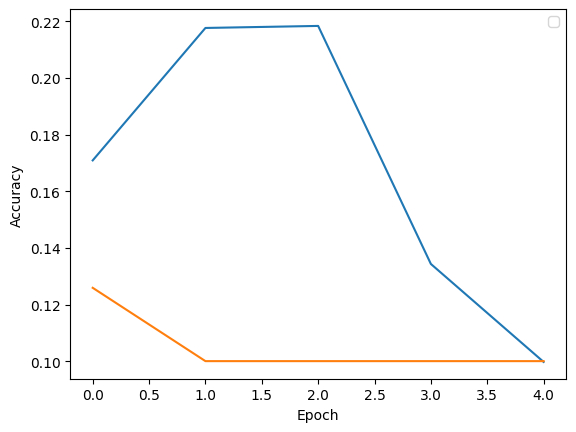

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()